<a href="https://colab.research.google.com/github/yenlung/Python-AI-Book/blob/main/%E5%86%92%E9%9A%AA17_Cooper_%E7%9C%9F%E7%9A%84%E6%98%AF%E9%A6%AC%E7%88%BE%E6%BF%9F%E6%96%AF%E5%97%8E%EF%BC%9F%E4%BD%BF%E7%94%A8%E5%90%8D%E9%96%80_CNN_%E5%B9%AB%E5%8A%A9%E8%BE%A8%E8%AD%98%EF%BC%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

### 1. 讀入資料集

In [ ]:
!wget --no-check-certificate \
    https://github.com/yenlung/Python-AI-Book/raw/main/dataset/Cooper_img.zip \
    -O /content/Cooper.zip

--2022-08-16 04:09:13--  https://github.com/yenlung/Python-AI-Book/raw/main/dataset/Cooper_img.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yenlung/Python-AI-Book/main/dataset/Cooper_img.zip [following]
--2022-08-16 04:09:13--  https://raw.githubusercontent.com/yenlung/Python-AI-Book/main/dataset/Cooper_img.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1023448 (999K) [application/zip]
Saving to: ‘/content/Cooper.zip’

/content/Cooper.zip 100%[===================>] 999.46K  --.-KB/s    in 0.008s  

2022-08-16 04:09:13 (129 MB/s) - ‘/content/Cooper.zip’ saved [1023448/1023448]



In [ ]:
import os
import zipfile

local_zip = '/content/Cooper.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
base_dir = '/content/'
cooper_dir = 'Cooper/'
thedir = base_dir + cooper_dir

In [ ]:
cooper = [f"{cooper_dir}/cooper0{i}.jpg" for i in range(1, 7)]

### 2. 讀入一隻 Cooper 試試

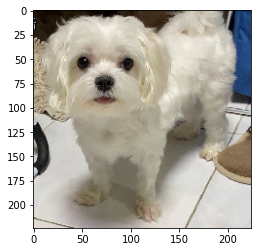

In [ ]:
img = load_img(cooper[2], target_size = (224, 224))
plt.imshow(img)

In [ ]:
x = img_to_array(img)

### 3. 讀入 ResNet50 及 labels

In [ ]:
with open('imagenet-classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [ ]:
labels[:10]

['tench 鯉魚類淡水魚',
 'goldfish 金魚',
 'great white shark 大白鯊',
 'tiger shark 虎鯊',
 'hammerhead 鎚頭鯊',
 'electric ray 電魟',
 'stingray 魟魚',
 'cock 公雞',
 'hen 母雞',
 'ostrich 鴕鳥']

In [ ]:
model = ResNet50()

In [ ]:
x = img_to_array(img).reshape(1, 224, 224, 3)

In [ ]:
inp = preprocess_input(x)

In [ ]:
outp = model.predict([inp])

In [ ]:
y_pred = np.argmax(model.predict(inp), axis=-1)[0]

In [ ]:
print(f"ResNet 覺得是 {labels[y_pred]}")

ResNet 覺得是 Maltese dog 馬爾濟斯犬


### 4. 做成 Web App!

In [ ]:
!pip install gradio

     |████████████████████████████████| 1.7 MB 5.3 MB/s 
     |████████████████████████████████| 255 kB 43.0 MB/s 
     |████████████████████████████████| 84 kB 2.5 MB/s 
     |████████████████████████████████| 1.1 MB 38.8 MB/s 
     |████████████████████████████████| 2.0 MB 36.8 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 211 kB 46.0 MB/s 
     |████████████████████████████████| 54 kB 2.2 MB/s 
     |████████████████████████████████| 271 kB 49.2 MB/s 
     |████████████████████████████████| 94 kB 3.4 MB/s 
     |████████████████████████████████| 144 kB 47.4 MB/s 
     |████████████████████████████████| 10.9 MB 31.8 MB/s 
     |████████████████████████████████| 58 kB 5.2 MB/s 
     |████████████████████████████████| 79 kB 8.0 MB/s 
     |████████████████████████████████| 43 kB 1.7 MB/s 
     |████████████████████████████████| 3.6 MB 40.6 MB/s 
     |████████████████████████████████| 61 kB 380 kB/s 
     |████████████████████████

In [ ]:
import gradio as gr

In [ ]:
def classify_image(inp):
    inp = inp.reshape((-1, 224, 224, 3))
    inp = preprocess_input(inp)
    prediction = resnet.predict(inp).flatten()
    return {labels[i]: float(prediction[i]) for i in range(1000)}

image = gr.inputs.Image(shape=(224, 224), label="請上傳一張圖片")
label = gr.outputs.Label(num_top_classes=3, label="模型猜測的答案是：")
sample_images = [[f'cooper0{i}.jpg'] for i in range(1, 7)]

gr.Interface(fn=classify_image, 
             inputs=image, 
             outputs=label, 
             examples=sample_images).launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://14329.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7f662599b6d0>,
 'http://127.0.0.1:7860/',
 'https://14329.gradio.app')